# 1. Reading Data & Preprocessing

In [1]:
import glob
import os
import random
import pandas as pd
import numpy as np 
#import keras
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
#from keras.utils import to_categorical
#from keras.layers import Dropout
#from keras.layers import Dense
#from keras import models
from sklearn.ensemble import IsolationForest
#from keras import optimizers
import itertools
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
os.chdir("/scratch/dr2de/bro-anonymized-labeled-conn-logs")

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#random sampling
#filename = "merged.csv"
#n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
#s = 1000000 #desired sample size
#skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list

In [3]:
#preprocessing data
#df = pd.read_csv(filename, skiprows=skip)
#df = df.drop(df.columns[0], axis=1)
#df = pd.concat([df, df['history'].str.join('|').str.get_dummies()], axis = 1)
#df = df.drop(["history","honeypot","blacklist","whitelist"], axis=1)
#df = pd.concat([df, pd.get_dummies(df.conn_state.apply(pd.Series), prefix="", prefix_sep="")], axis = 1)
#df = df.drop(["conn_state"], axis=1)
#df = df.replace('-', 0)
#df.head()

,ts,src_ip,src_port,dest_ip,dest_port,duration,src_bytes,dest_bytes,src_pkts,dest_pkts,...,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR
0,1.547096e+09,194.28.115.245,47821,3.110.190.232,33897,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1.547096e+09,167.99.214.206,17731,3.110.144.95,80,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1.547096e+09,3.110.95.233,61774,52.1.136.181,80,0.013601,159,1004,5,4,...,0,0,0,0,0,0,0,1,0,0
3,1.547096e+09,78.128.112.46,57462,3.110.30.43,20953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1.547096e+09,58.59.133.198,64153,3.110.123.157,1433,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#df.to_csv("sample.csv", index=False)

In [2]:
df = pd.read_csv("sample.csv", index_col= False)
df.head()

,ts,src_ip,src_port,dest_ip,dest_port,duration,src_bytes,dest_bytes,src_pkts,dest_pkts,...,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR
0,1.547096e+09,194.28.115.245,47821,3.110.190.232,33897,0.000000,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1.547096e+09,167.99.214.206,17731,3.110.144.95,80,0.000000,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1.547096e+09,3.110.95.233,61774,52.1.136.181,80,0.013601,159,1004,5,4,...,0,0,0,0,0,0,0,1,0,0
3,1.547096e+09,78.128.112.46,57462,3.110.30.43,20953,0.000000,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1.547096e+09,58.59.133.198,64153,3.110.123.157,1433,0.000000,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [3]:
df2 = pd.read_csv("sample_unknown2.csv", index_col= False)
df2.head()

,src_ip,src_port,dest_ip,dest_port,duration,src_bytes,dest_bytes,src_pkts,dest_pkts,local,...,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR
0,185.176.27.66,42568,3.110.217.160,10830,0.000000,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,190.194.181.145,55097,3.110.226.27,80,16.564471,389,546,5,3,0,...,0,0,0,0,0,0,1,0,0,0
2,114.105.232.52,45952,3.110.248.157,23,0.000000,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,107.170.105.134,32767,3.110.39.128,8545,0.000000,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,91.218.47.186,48085,3.110.137.69,23,0.000000,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
#random sampling of unknown data 
#filename = "merged_unknown.csv"
#n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
#s = 297533 #desired sample size
#skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list

In [10]:
pd.set_option('display.max_columns', None)
#preprocessing data
#df2 = pd.read_csv(filename, skiprows=skip)
#df2 = df2.drop(df.columns[0], axis=1)
#df2 = pd.concat([df2, df2['history'].str.join('|').str.get_dummies()], axis = 1)
#df2 = df2.drop(["history","honeypot","blacklist","whitelist"], axis=1)
#df2 = pd.concat([df2, pd.get_dummies(df2.conn_state.apply(pd.Series), prefix="", prefix_sep="")], axis = 1)
#df2 = df2.drop(["conn_state"], axis=1)
#df2 = df2.replace('-', 0)
#df2.head()

,src_ip,src_port,dest_ip,dest_port,duration,src_bytes,dest_bytes,src_pkts,dest_pkts,local,src_ip_ext,label,-,A,D,F,H,I,R,S,T,^,a,d,f,h,i,r,t,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR
0,176.119.4.39,42986,3.110.99.94,55832,0,0,0,1,0,0,176.119.4.39,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3.110.248.189,52662,54.191.55.106,443,0.378674,704,5889,13,12,1,54.191.55.106,-1,0,1,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,176.119.4.29,53628,3.110.127.85,31852,0,0,0,1,0,0,176.119.4.29,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,185.211.245.168,46753,3.110.173.120,10158,0,0,0,1,0,0,185.211.245.168,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,185.143.221.16,51867,3.110.73.148,3392,0,0,0,1,0,0,185.143.221.16,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [18]:
#df2.to_csv("sample_unknown2.csv", index=False)

In [19]:
#more cleaning
sample2 = df2.drop(["src_ip","src_port","dest_ip","dest_port","src_ip_ext"], axis=1)
sample2["duration"] = sample2["duration"].astype(float)
sample2["duration"] = np.log((sample2["duration"].astype('int'))+0.001)
sample2["src_bytes"] = sample2["src_bytes"].astype(float)
sample2["src_bytes"] = np.log((sample2["src_bytes"].astype('int'))+0.001)
sample2["dest_bytes"] = sample2["dest_bytes"].astype(float)
sample2["dest_bytes"] = np.log((sample2["dest_bytes"].astype('int'))+0.001)
sample2["src_pkts"] = np.log((sample2["src_pkts"].astype('int'))+0.001)
sample2["dest_pkts"] = np.log((sample2["dest_pkts"].astype('int'))+0.001)

In [20]:
#more cleaning
sample = df.drop(["ts","src_ip","src_port","dest_ip","dest_port","src_ip_ext"], axis=1)
sample["duration"] = sample["duration"].astype(float)
sample["duration"] = np.log((sample["duration"].astype('int'))+0.001)
sample["src_bytes"] = sample["src_bytes"].astype(float)
sample["src_bytes"] = np.log((sample["src_bytes"].astype('int'))+0.001)
sample["dest_bytes"] = sample["dest_bytes"].astype(float)
sample["dest_bytes"] = np.log((sample["dest_bytes"].astype('int'))+0.001)
sample["src_pkts"] = np.log((sample["src_pkts"].astype('int'))+0.001)
sample["dest_pkts"] = np.log((sample["dest_pkts"].astype('int'))+0.001)

sample.insert(23, 's', 0)
sample2 = sample2.drop(sample2.columns[7], axis=1)

# 5. Jeremy Howard's Methodology

In [27]:
from fastai.imports import *


In [21]:
#from fastai.structured import *

ModuleNotFoundError: No module named 'fastai.structured'

In [28]:
#function for plotting confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## 5.1 Class Distribution - (Malicious/Benign) = (70/30)

In [35]:
rf_sample = df.drop(["src_ip_ext","src_ip"], axis=1)
rf_sample["duration"] = rf_sample["duration"].astype(float)
rf_sample["duration"] = np.log((rf_sample["duration"].astype('int'))+0.001)
rf_sample["src_bytes"] = rf_sample["src_bytes"].astype(float)
rf_sample["src_bytes"] = np.log((rf_sample["src_bytes"].astype('int'))+0.001)
rf_sample["dest_bytes"] = rf_sample["dest_bytes"].astype(float)
rf_sample["dest_bytes"] = np.log((rf_sample["dest_bytes"].astype('int'))+0.001)
rf_sample["src_pkts"] = np.log((rf_sample["src_pkts"].astype('int'))+0.001)
rf_sample["dest_pkts"] = np.log((rf_sample["dest_pkts"].astype('int'))+0.001)
rf_sample['ts'] = pd.to_datetime(rf_sample['ts'],unit='s')
rf_sample["src_port"] = rf_sample["src_port"].astype('category')
rf_sample["dest_ip"] = rf_sample["dest_ip"].astype('category')
rf_sample["dest_port"] = rf_sample["dest_port"].astype('category')
rf_sample["src_port"] = rf_sample["src_port"].cat.codes
rf_sample["dest_ip"] = rf_sample["dest_ip"].cat.codes
rf_sample["dest_port"] = rf_sample["dest_port"].cat.codes

In [42]:
rf_sample2 = df2.drop(["src_ip_ext","src_ip"], axis=1)
rf_sample2["duration"] = rf_sample2["duration"].astype(float)
rf_sample2["duration"] = np.log((rf_sample2["duration"].astype('int'))+0.001)
rf_sample2["src_bytes"] = rf_sample2["src_bytes"].astype(float)
rf_sample2["src_bytes"] = np.log((rf_sample2["src_bytes"].astype('int'))+0.001)
rf_sample2["dest_bytes"] = rf_sample2["dest_bytes"].astype(float)
rf_sample2["dest_bytes"] = np.log((rf_sample2["dest_bytes"].astype('int'))+0.001)
rf_sample2["src_pkts"] = np.log((rf_sample2["src_pkts"].astype('int'))+0.001)
rf_sample2["dest_pkts"] = np.log((rf_sample2["dest_pkts"].astype('int'))+0.001)
#rf_sample2['ts'] = pd.to_datetime(rf_sample2['ts'],unit='s')
rf_sample2["src_port"] = rf_sample2["src_port"].astype('category')
rf_sample2["dest_ip"] = rf_sample2["dest_ip"].astype('category')
rf_sample2["dest_port"] = rf_sample2["dest_port"].astype('category')
rf_sample2["src_port"] = rf_sample2["src_port"].cat.codes
rf_sample2["dest_ip"] = rf_sample2["dest_ip"].cat.codes
rf_sample2["dest_port"] = rf_sample2["dest_port"].cat.codes

In [39]:
rf_sample.head()

,ts,src_port,dest_ip,dest_port,duration,src_bytes,dest_bytes,src_pkts,dest_pkts,local,label,A,D,F,H,Q,R,S,T,^,a,d,f,h,i,q,r,t,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR
0,2019-01-10 04:59:55.095793,45211,35213,3510,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-01-10 04:59:54.912269,16045,22263,32,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2019-01-10 04:59:55.054457,59163,76942,32,-6.907755,5.068910,6.911748,1.609638,1.386544,1,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2019-01-10 04:59:55.291748,54851,55223,2965,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2019-01-10 04:59:55.509008,61542,16189,412,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
rf_sample2.head()

,src_port,dest_ip,dest_port,duration,src_bytes,dest_bytes,src_pkts,dest_pkts,local,label,-,A,D,F,H,I,R,S,T,^,a,d,f,h,i,r,t,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR
0,29100,65273,6877,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37924,66095,167,-6.907755,6.556780,8.680842,2.565026,2.484990,1,-1,0,1,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38866,9881,4753,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,32366,22341,2667,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,37156,58160,740,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
#converting date into different fatures
add_datepart(rf_sample, 'ts')

NameError: name 'add_datepart' is not defined

In [50]:
rf_sample = rf_sample.drop(rf_sample.columns[0], axis=1)
rf_sample.insert(23, 's', 0)
rf_sample.insert(14, 'I', 0)
rf_sample.head()

,src_port,dest_ip,dest_port,duration,src_bytes,dest_bytes,src_pkts,dest_pkts,local,label,A,D,F,H,I,Q,R,S,T,^,a,d,f,h,i,q,r,t,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR
0,45211,35213,3510,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,16045,22263,32,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,59163,76942,32,-6.907755,5.068910,6.911748,1.609638,1.386544,1,0,1,1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,54851,55223,2965,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,61542,16189,412,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [85]:
y_train.sum()

label    702467
dtype: int64

In [93]:
1000000-702467

297533

In [117]:
#rf_sample2['label'] = rf_sample2['label'].replace(-1, 0)
#rf_sample2 = rf_sample2.drop(rf_sample2.columns[10], axis=1)
rf_sample2.insert(15, 'Q', 0)
rf_sample2.insert(25, 'q', 0)
rf_sample2.head()

,src_port,dest_ip,dest_port,duration,src_bytes,dest_bytes,src_pkts,dest_pkts,local,label,A,D,F,H,I,Q,R,S,T,^,a,d,f,h,i,q,r,t,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR
0,45211,35213,3510,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,16045,22263,32,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,54851,55223,2965,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,61542,16189,412,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,45211,58393,3510,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,6938,55237,1070,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,39236,73289,412,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,52759,12666,4611,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
11,45211,31360,3505,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
13,49637,57357,412,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [56]:
rf_sample2.shape

(297533, 41)

In [71]:
mal = rf_sample.loc[rf_sample['label'] == 1].head(90161)
ben = rf_sample.loc[rf_sample['label'] == 0].head(210377)
rf_sampler = pd.concat([mal,ben], axis = 0)
rf_sampler.label.value_counts(normalize = True)

0    0.700001
1    0.299999
Name: label, dtype: float64

In [72]:
X_train = rf_sampler.loc[:, rf_sampler.columns != 'label']
y_train = rf_sampler.loc[:, rf_sampler.columns == 'label']

In [73]:
X_test = rf_sample2.loc[:, rf_sample2.columns != 'label']
y_test = rf_sample2.loc[:, rf_sample2.columns == 'label']

In [34]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [43]:
#X_train = sample.loc[:, sample.columns != 'label']
#y_train = sample.loc[:, sample.columns == 'label']
#X_test = sample2.loc[:, sample2.columns != 'label']
#y_test = sample2.loc[:, sample2.columns == 'label']

In [73]:
#subsetting train values for faster model execution
def split_vals(a,n): return a[:n].copy(), a[n:].copy()
X_train_sub, _ = split_vals(X_train, 50000)
y_train_sub, _ = split_vals(y_train, 50000)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Confusion matrix, without normalization
[[156864 140669]
 [     0      0]]


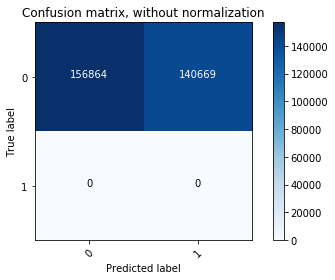

In [74]:
m = RandomForestClassifier(n_estimators=200, min_samples_leaf=100, max_features=0.5, n_jobs=-1)
m.fit(X_train, y_train) 
pred_y = m.predict(X_test)
cm= confusion_matrix(y_test, pred_y)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix, without normalization')

In [75]:
X_test['label'] = pred_y
uknown_preds4 = X_test
uknown_preds4['label'].value_counts()

0    156864
1    140669
Name: label, dtype: int64

In [83]:
156864+140669

297533

In [81]:
rf_sample2.head()

,src_port,dest_ip,dest_port,duration,src_bytes,dest_bytes,src_pkts,dest_pkts,local,label,A,D,F,H,I,R,S,T,^,a,d,f,h,i,q,r,s,t,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR
0,40295,37592,3446,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,52817,40258,59,2.772651,5.963582,6.302621,1.609638,1.098946,0,1,1,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,43676,46288,19,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,30514,52144,2889,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,45805,14966,19,-6.907755,-6.907755,-6.907755,0.001000,-6.907755,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [40]:
#tn, fp, fn, tp = cm.ravel()
#precision=tp/(tp+fp)
#recall=tp/(tp+fn)
#fpr = fp/(fp+ tn)
#accuracy = (tp + tn)/(tn + tp + fn + fp)
#print(precision, recall, fpr*100, accuracy*100)

0.9532165191009845 0.9964058266167308 11.53752188607028 96.3130303030303


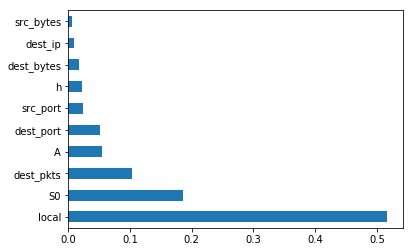

In [41]:
#feat_importances = pd.Series(m.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='barh')

## 5.2 Class Distribution - (Malicious/Benign) - (50/50)

In [67]:
mal = rf_sample.loc[rf_sample['label'] == 1].head(150269)
ben = rf_sample.loc[rf_sample['label'] == 0].head(150269)
rf_sampler = pd.concat([mal,ben], axis = 0)
rf_sampler.label.value_counts(normalize = True)


1    0.5
0    0.5
Name: label, dtype: float64

In [68]:
X_train = rf_sampler.loc[:, rf_sampler.columns != 'label']
y_train = rf_sampler.loc[:, rf_sampler.columns == 'label']
X_test = rf_sample2.loc[:, rf_sample2.columns != 'label']
y_test = rf_sample2.loc[:, rf_sample2.columns == 'label']

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Confusion matrix, without normalization
[[115738 181795]
 [     0      0]]


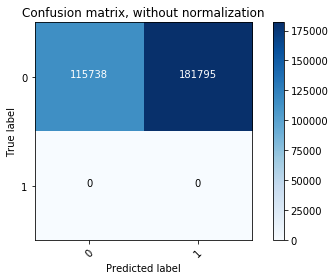

In [69]:
m = RandomForestClassifier(n_estimators=200, min_samples_leaf=100, max_features=0.5, n_jobs=-1)
m.fit(X_train, y_train) 
pred_y = m.predict(X_test)
cm= confusion_matrix(y_test, pred_y)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix, without normalization')

In [70]:
X_test['label'] = pred_y
uknown_preds3 = X_test
uknown_preds3['label'].value_counts()

1    181795
0    115738
Name: label, dtype: int64

In [82]:
181795+115738

297533

## 5.3 Class Distribution - (Malicious/Benign) - (10/90)

In [63]:
mal = rf_sample.loc[rf_sample['label'] == 1].head(30054)
ben = rf_sample.loc[rf_sample['label'] == 0].head(270484)
rf_sampler = pd.concat([mal,ben], axis = 0)
rf_sampler.label.value_counts(normalize = True)

0    0.899999
1    0.100001
Name: label, dtype: float64

In [64]:
X_train = rf_sampler.loc[:, rf_sampler.columns != 'label']
y_train = rf_sampler.loc[:, rf_sampler.columns == 'label']
X_test = rf_sample2.loc[:, rf_sample2.columns != 'label']
y_test = rf_sample2.loc[:, rf_sample2.columns == 'label']

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Confusion matrix, without normalization
[[212311  85222]
 [     0      0]]


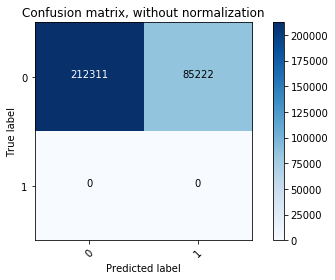

In [65]:
m = RandomForestClassifier(n_estimators=200, min_samples_leaf=100, max_features=0.5, n_jobs=-1)
m.fit(X_train, y_train) 
pred_y = m.predict(X_test)
cm= confusion_matrix(y_test, pred_y)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix, without normalization')

In [66]:
X_test['label'] = pred_y
uknown_preds2 = X_test
uknown_preds2['label'].value_counts()

0    212311
1     85222
Name: label, dtype: int64

In [81]:
85222+212311

297533

## 5.4 Class Distribution - (Malicious/Benign) - (1/99)

In [58]:

mal = rf_sample.loc[rf_sample['label'] == 1].head(3005)
ben = rf_sample.loc[rf_sample['label'] == 0].head(297533)
rf_sampler = pd.concat([mal,ben], axis = 0)
rf_sampler.label.value_counts(normalize = True)

0    0.990001
1    0.009999
Name: label, dtype: float64

In [108]:
300538-297533

3005

In [134]:
X_train.head()

,src_port,dest_ip,dest_port,duration,src_bytes,dest_bytes,src_pkts,dest_pkts,local,A,D,F,H,Q,R,S,T,^,a,d,f,h,s,i,q,r,t,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR
0,45211,35213,3510,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,16045,22263,32,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,54851,55223,2965,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,61542,16189,412,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,45211,58393,3510,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [135]:
X_test.head()

,src_port,dest_ip,dest_port,duration,src_bytes,dest_bytes,src_pkts,dest_pkts,local,A,D,F,H,I,R,S,T,^,a,d,f,h,i,q,r,s,t,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR,label
0,25906,36108,38,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,42946,42263,12,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,28346,62276,413,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,29057,31649,5825,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,16783,49543,13,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [59]:
X_train = rf_sampler.loc[:, rf_sampler.columns != 'label']
y_train = rf_sampler.loc[:, rf_sampler.columns == 'label']

In [60]:
X_test = rf_sample2.loc[:, rf_sample2.columns != 'label']
y_test = rf_sample2.loc[:, rf_sample2.columns == 'label']

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Confusion matrix, without normalization
[[296210   1323]
 [     0      0]]


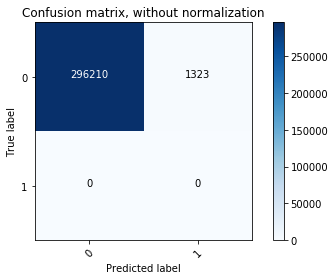

In [61]:
m = RandomForestClassifier(n_estimators=200, min_samples_leaf=100, max_features=0.5, n_jobs=-1)
m.fit(X_train, y_train) 
pred_y = m.predict(X_test)
cm= confusion_matrix(y_test, pred_y)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix, without normalization')

In [62]:
X_test['label'] = pred_y
uknown_preds = X_test
uknown_preds['label'].value_counts()

0    296210
1      1323
Name: label, dtype: int64

In [78]:

# Figuring out which connections were always malicious
benign_99 = uknown_preds[uknown_preds['label'] == 1]
benign_90 = uknown_preds2[uknown_preds2['label'] == 1]
benign_70 = uknown_preds4[uknown_preds4['label'] == 1]
benign_50 = uknown_preds3[uknown_preds3['label'] == 1]

In [84]:
# 70, 50, 90, 99 from most benign predictions to least 300538
print(benign_50['label'].sum()/297533,benign_70['label'].sum()/297533,benign_90['label'].sum()/297533,benign_99['label'].sum()/297533)

0.6110078545909193 0.4727845314637368 0.28642873227507537 0.004446565591043682


In [80]:
296210+1323

297533

In [87]:
benign_50.head()

,src_port,dest_ip,dest_port,duration,src_bytes,dest_bytes,src_pkts,dest_pkts,local,A,D,F,H,I,Q,R,S,T,^,a,d,f,h,i,q,r,t,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR,label
0,29100,65273,6877,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,38866,9881,4753,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,37156,58160,740,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,2474,25521,28,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6,36673,29282,5075,-6.907755,-6.907755,-6.907755,0.001,-6.907755,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [95]:
s1 = benign_50.merge(benign_70)
s1.shape

(141516, 41)

In [100]:
benign_99.shape

(1323, 41)

In [114]:
# malicious in each group 
s1 = benign_99.merge(benign_90)
s2 = s1.merge(benign_70)
s3 = s2.merge(benign_50)
s3.shape



(1320, 41)